In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from imblearn.over_sampling import SMOTE
import seaborn as sns

1. Data input

In [ ]:
data_path = "manufacturing_defect_dataset.csv"
df = pd.read_csv(data_path)

print(df.shape)
print(df.columns.tolist())
df.head()

(3240, 17)
['ProductionVolume', 'ProductionCost', 'SupplierQuality', 'DeliveryDelay', 'DefectRate', 'QualityScore', 'MaintenanceHours', 'DowntimePercentage', 'InventoryTurnover', 'StockoutRate', 'WorkerProductivity', 'SafetyIncidents', 'EnergyConsumption', 'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost', 'DefectStatus']


,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


2. Data cleaning

In [ ]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [ ]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print("kiểm tra NA sau cleaning")
print(df.isna().sum())

kiểm tra NA sau cleaning
ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64


3. EDA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProductionVolume,3240.0,548.523148,262.402073,100.000000,322.000000,549.000000,775.250000,999.000000
ProductionCost,3240.0,12423.018476,4308.051904,5000.174521,8728.829280,12405.204656,16124.462428,19993.365549
SupplierQuality,3240.0,89.833290,5.759143,80.004820,84.869219,89.704861,94.789936,99.989214
DeliveryDelay,3240.0,2.558951,1.705804,0.000000,1.000000,3.000000,4.000000,5.000000
DefectRate,3240.0,2.749116,1.310154,0.500710,1.598033,2.708775,3.904533,4.998529
QualityScore,3240.0,80.134272,11.611750,60.010098,70.103420,80.265312,90.353822,99.996993
MaintenanceHours,3240.0,11.476543,6.872684,0.000000,5.750000,12.000000,17.000000,23.000000
DowntimePercentage,3240.0,2.501373,1.443684,0.001665,1.264597,2.465151,3.774861,4.997591
InventoryTurnover,3240.0,6.019662,2.329791,2.001611,3.983249,6.022389,8.050222,9.998577
StockoutRate,3240.0,0.050878,0.028797,0.000002,0.026200,0.051837,0.075473,0.099997


In [ ]:
print("\nTỉ lệ Defect Status: (1 = High Defect, 0 = Low Defect)")
print(df["DefectStatus"].value_counts(normalize=True) * 100)


Tỉ lệ Defect Status: (1 = High Defect, 0 = Low Defect)
DefectStatus
1    84.04321
0    15.95679
Name: proportion, dtype: float64


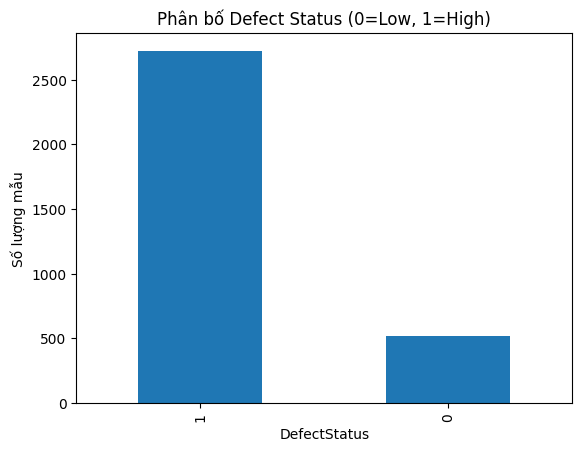

In [ ]:
df["DefectStatus"].value_counts().plot(
    kind="bar",
    title="Phân bố Defect Status (0=Low, 1=High)"
)
plt.xlabel("Defect Status")
plt.ylabel("Số lượng mẫu")
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
group_stats = df.groupby("DefectStatus")[numeric_cols].mean().T
group_stats

DefectStatus,0,1
ProductionVolume,470.866538,563.267352
ProductionCost,12158.877326,12473.169403
SupplierQuality,89.328686,89.929096
DeliveryDelay,2.537718,2.562982
DefectRate,2.010328,2.889386
QualityScore,85.442375,79.126454
MaintenanceHours,6.791103,12.366140
DowntimePercentage,2.487697,2.503970
InventoryTurnover,5.983667,6.026496
StockoutRate,0.048197,0.051387


4. Phân tích tương quan

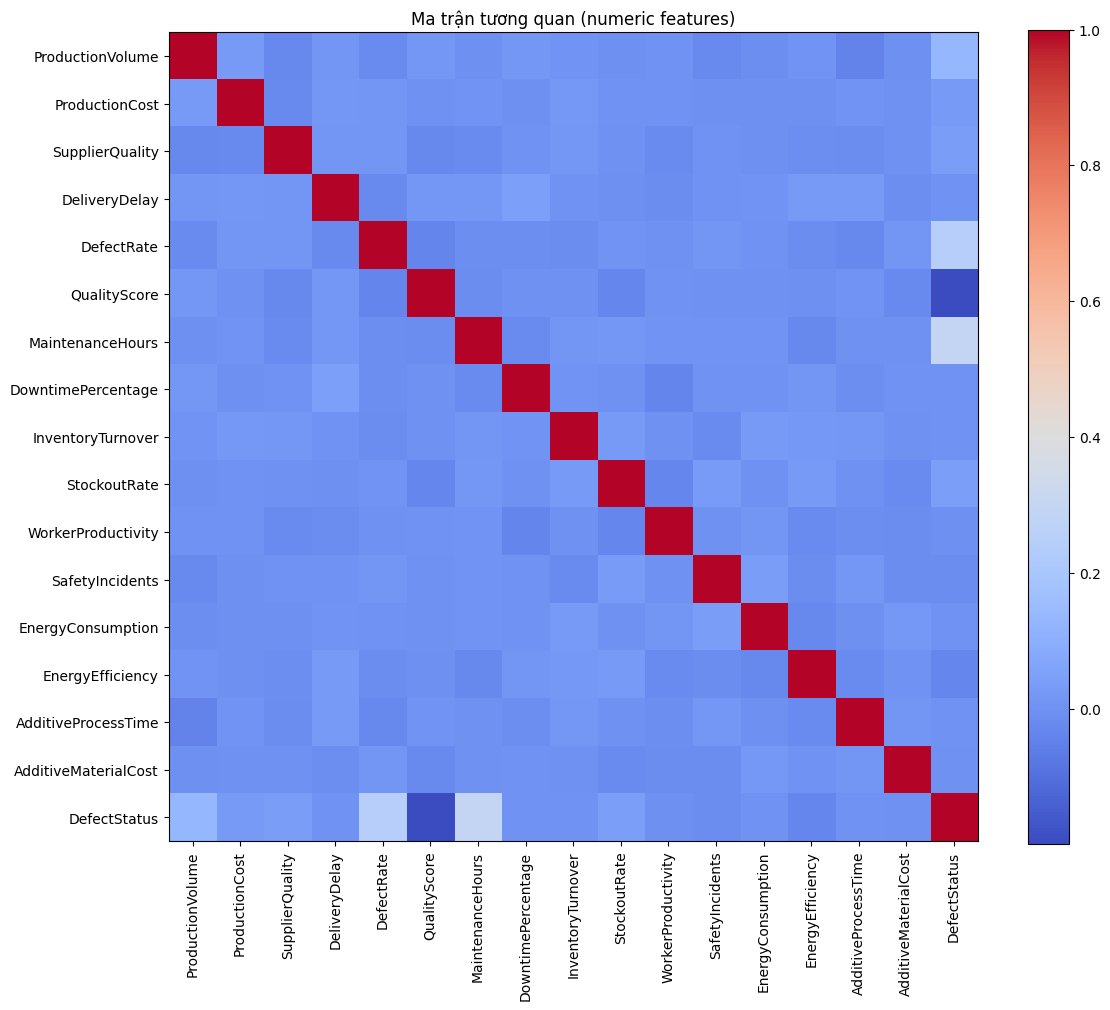

tương quan các biến với Defect Status:
DefectStatus            1.000000
MaintenanceHours        0.297107
DefectRate              0.245746
ProductionVolume        0.128973
StockoutRate            0.040574
SupplierQuality         0.038184
ProductionCost          0.026720
InventoryTurnover       0.006733
AdditiveProcessTime     0.005619
DeliveryDelay           0.005425
EnergyConsumption       0.005039
DowntimePercentage      0.004128
AdditiveMaterialCost   -0.000953
WorkerProductivity     -0.005224
SafetyIncidents        -0.016039
EnergyEfficiency       -0.035031
QualityScore           -0.199219
Name: DefectStatus, dtype: float64


In [ ]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Ma trận tương quan (numeric features)")
plt.tight_layout()
plt.show()

#Độ tương quan với riêng biến Defect Status
if "DefectStatus" in corr.columns:
    corr_target = corr["DefectStatus"].sort_values(ascending=False)
    print("tương quan các biến với Defect Status:")
    print(corr_target)

5. Chuiẩn bị tham số đầu vào

In [ ]:
y = df["DefectStatus"]

corr_target = df[numeric_cols].corr()["DefectStatus"]

selected_features = corr_target[
    (corr_target.abs() > 0) & (corr_target.index != "DefectStatus")
].index.tolist()

X = df[selected_features]
print("\nLấy những feature lớn hơn 0.1:")
print(selected_features)


Lấy những feature lớn hơn 0.1:
['ProductionVolume', 'ProductionCost', 'SupplierQuality', 'DeliveryDelay', 'DefectRate', 'QualityScore', 'MaintenanceHours', 'DowntimePercentage', 'InventoryTurnover', 'StockoutRate', 'WorkerProductivity', 'SafetyIncidents', 'EnergyConsumption', 'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Kích thước X_train:", X_train.shape)
print("Kích thước X_test:", X_test.shape)

Kích thước X_train: (2592, 16)
Kích thước X_test: (648, 16)


In [ ]:
use_smote = True

if use_smote:
    sm = SMOTE(random_state=42)
    X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
    print("sau SMOTE:")
    print(y_train_smote.value_counts(normalize=True) * 100)
else:
    X_train_res, y_train_res = X_train, y_train

sau SMOTE:
DefectStatus
1    50.0
0    50.0
Name: proportion, dtype: float64


6. Train mô hình

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(
    max_iter=1000,
    random_state=42
)
model.fit(X_train_scaled, y_train_smote)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

Accuracy: 0.7577

Classification Report:
              precision    recall  f1-score   support

           0     0.3663    0.7184    0.4852       103
           1     0.9350    0.7651    0.8416       545

    accuracy                         0.7577       648
   macro avg     0.6507    0.7418    0.6634       648
weighted avg     0.8446    0.7577    0.7849       648


Confusion Matrix:
 [[ 74  29]
 [128 417]]


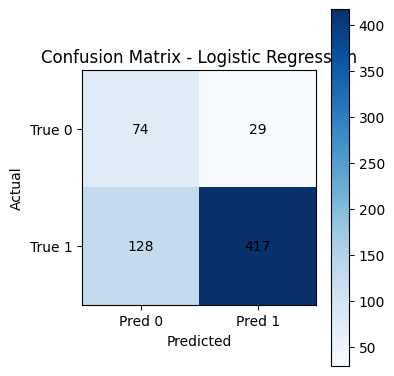


ROC-AUC: 0.7854


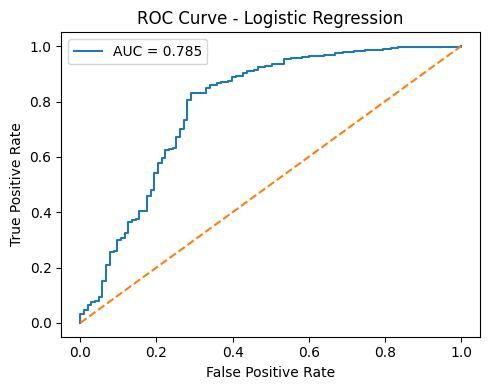

In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Pred 0", "Pred 1"])
plt.yticks(tick_marks, ["True 0", "True 1"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC-AUC
auc = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

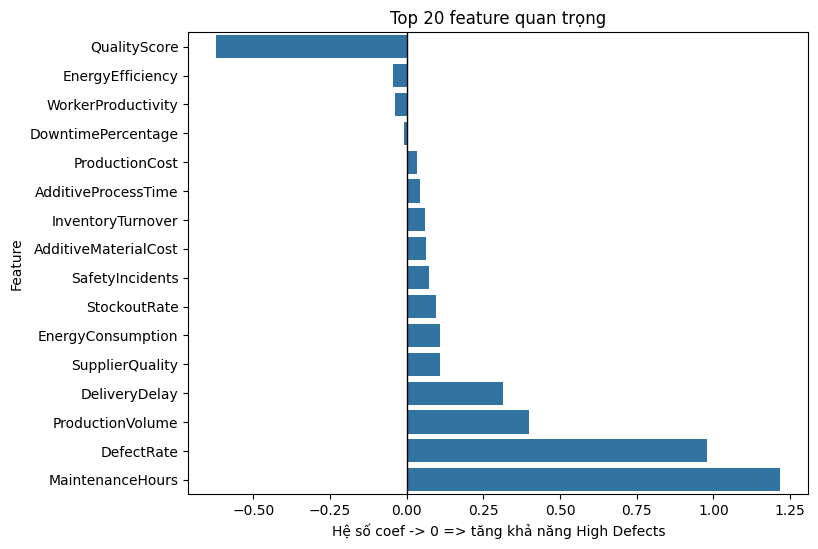

In [ ]:
coeffs = pd.DataFrame({
    "feature": selected_features,
    "coef": model.coef_[0]
})
coeffs["abs_coef"] = coeffs["coef"].abs()
coeffs = coeffs.sort_values("abs_coef", ascending=False)

coeffs.head(20)
top_n = 20
top_features = coeffs.head(top_n).sort_values("coef")

plt.figure(figsize=(8,6))
sns.barplot(data=top_features, x="coef", y="feature")
plt.axvline(0, color="black", linewidth=1)
plt.title(f"Top {top_n} feature quan trọng")
plt.xlabel("Hệ số coef -> 0 => tăng khả năng High Defects")
plt.ylabel("Feature")
plt.show()